# Hi :)

----

# Import libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import beta

# Creating Datasets

Hard data

In [2]:
Hard_data= pd.DataFrame({'Sample1': [0.3, 0.5, 0.1, 0.1],
              'Sample2': [0.4, 0.3, 0.1, 0.2],
              'Label': ['safe', 'low-risk', 'high-risk', 'dangerous']})

Hard_data

,Sample1,Sample2,Label
0,0.3,0.4,safe
1,0.5,0.3,low-risk
2,0.1,0.1,high-risk
3,0.1,0.2,dangerous


Soft Data

In [3]:
# [Belief, Disbelief, Uncertainty]
Soft_data= pd.DataFrame({'Expert_Number': [1, 2, 3, 4],
              'Sample1': [[0.3, 0.4, 0.3], [0.5, 0.3, 0.2], [0.6, 0.2, 0.2], [0.7, 0.2, 0.1]],
              'Sample2': [[0.2, 0.2, 0.6], [0.3, 0.4, 0.3], [0.6, 0.1, 0.3], [0.1, 0.2, 0.7]]})

Soft_data

,Expert_Number,Sample1,Sample2
0,1,"[0.3, 0.4, 0.3]","[0.2, 0.2, 0.6]"
1,2,"[0.5, 0.3, 0.2]","[0.3, 0.4, 0.3]"
2,3,"[0.6, 0.2, 0.2]","[0.6, 0.1, 0.3]"
3,4,"[0.7, 0.2, 0.1]","[0.1, 0.2, 0.7]"


In [13]:
Soft_data[Soft_data['Expert_Number'] == 1]['Sample1'].values.tolist()[0]

[0.3, 0.4, 0.3]

# Initialization

In [34]:
# Defining a function to calculate combine belief, disbelief and uncertainty of two experts
def BDU(e1, e2, sample_number):
    # Extracting w by the expert number and sample number
    w1= Soft_data[Soft_data['Expert_Number'] == e1][f'Sample{sample_number}'].values.tolist()[0]
    w2= Soft_data[Soft_data['Expert_Number'] == e2][f'Sample{sample_number}'].values.tolist()[0]

    # Extracting belief and disbelief and uncertainty
    b1, d1, u1= w1
    b2, d2, u2= w2

    # Calculating combine belief and disbelief and uncertainty
    b= np.round(((b1 * u2) + (b2 * u1)) / (u1 + u2 - (u1 * u2)), 4)
    d= np.round(((d1 * u2) + (d2 * u1)) / (u1 + u2 - (u1 * u2)), 4)
    u= np.round((u1 * u2) / (u1 + u2 - (u1 * u2)), 4)

    return [b, d, u]

# Defining a function to calculate the expectation for two experts
def Expectation(e1, e2, sample_number, a):
    b, _, u= BDU(e1, e2, sample_number)
    e= np.round(b + (u * a), 4)
    return e

# Combining

Calculating Expectations for each sample

In [ ]:
# Sample 1
E1= np.mean([Expectation(1, 2, 1, 0.5), Expectation(2, 3, 1, 0.5), Expectation(3, 4, 1, 0.5)]).round(4)

# Sample 2
E2= np.mean([Expectation(1, 2, 2, 0.3), Expectation(2, 3, 2, 0.3), Expectation(3, 4, 2, 0.3)]).round(4)

# Print the results
print(f'E1= {E1}\nE2= {E2}')

E1= 0.654
E2= 0.5466


Extracting hard data for low-risk class

In [55]:
H1, H2= Hard_data[Hard_data['Label'] == 'low-risk'][['Sample1', 'Sample2']].values.tolist()[0]

# Print the results
print(f'H1= {H1}\nH2= {H2}')

H1= 0.5
H2= 0.3


# Beta distribution

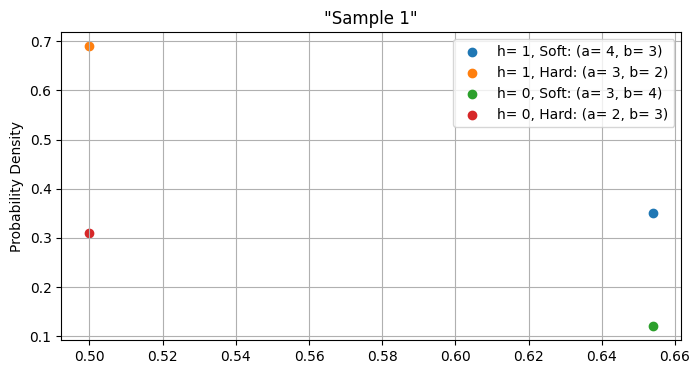

In [78]:
# Sample1
plt.figure(figsize= (8, 4))
plt.scatter(E1, 0.35, label= 'h= 1, Soft: (a= 4, b= 3)')
plt.scatter(H1, 0.69, label= 'h= 1, Hard: (a= 3, b= 2)')
plt.scatter(E1, 0.12, label= 'h= 0, Soft: (a= 3, b= 4)')
plt.scatter(H1, 0.31, label= 'h= 0, Hard: (a= 2, b= 3)')
plt.title('"Sample 1"')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

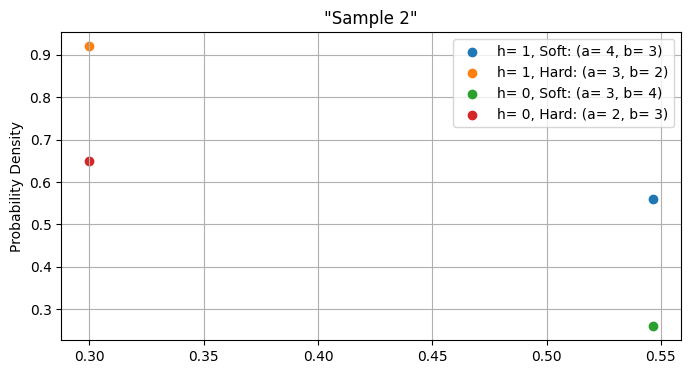

In [77]:
# Sample2
plt.figure(figsize= (8, 4))
plt.scatter(E2, 0.56, label= 'h= 1, Soft: (a= 4, b= 3)')
plt.scatter(H2, 0.92, label= 'h= 1, Hard: (a= 3, b= 2)')
plt.scatter(E2, 0.26, label= 'h= 0, Soft: (a= 3, b= 4)')
plt.scatter(H2, 0.65, label= 'h= 0, Hard: (a= 2, b= 3)')
plt.title('"Sample 2"')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()